Project Overview: Predicting Car Selling Prices

Problem Statement:
The goal of this project is to develop a machine learning model that can predict the selling prices of used cars based on various features such as the car's present price, kilometers driven, fuel type, seller type, transmission type, etc. This prediction will help potential sellers or buyers in estimating a fair price for used cars in the market.

Importing Libraries

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

Data Collection and Processing

In [48]:
# loading the data from csv file to pandas dataframe
car_dataset=pd.read_csv("car data.csv")

In [49]:
# inspecting the first 5 rows of the dataframe
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [50]:
# checking the number of rows and columns
car_dataset.shape

(301, 9)

In [51]:
# getting some information about the dataset
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [52]:
# checking the number of missing values
car_dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [53]:
# checking the distribution of categorical data
print(car_dataset.Fuel_Type.value_counts())
print(car_dataset.Seller_Type.value_counts())
print(car_dataset.Transmission.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


Visualisation

Text(0.5, 1.0, 'Distribution of Selling Price')

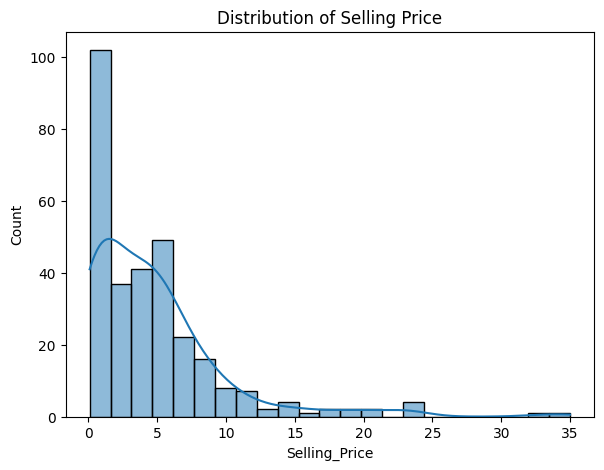

In [54]:
# Distribution of numerical features
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.histplot(data=car_dataset['Selling_Price'], kde=True)
plt.title('Distribution of Selling Price')

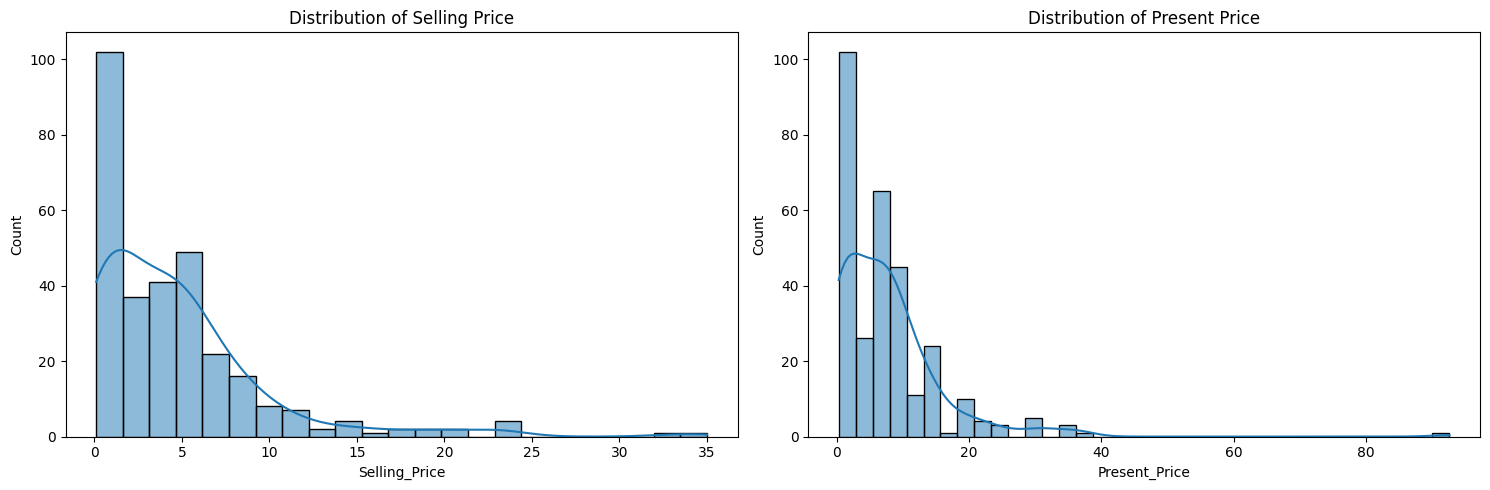

In [55]:
# Distribution of numerical features
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.histplot(data=car_dataset['Selling_Price'], kde=True)
plt.title('Distribution of Selling Price')

plt.subplot(1, 2, 2)
sns.histplot(data=car_dataset['Present_Price'], kde=True)
plt.title('Distribution of Present Price')
plt.tight_layout()
plt.show()

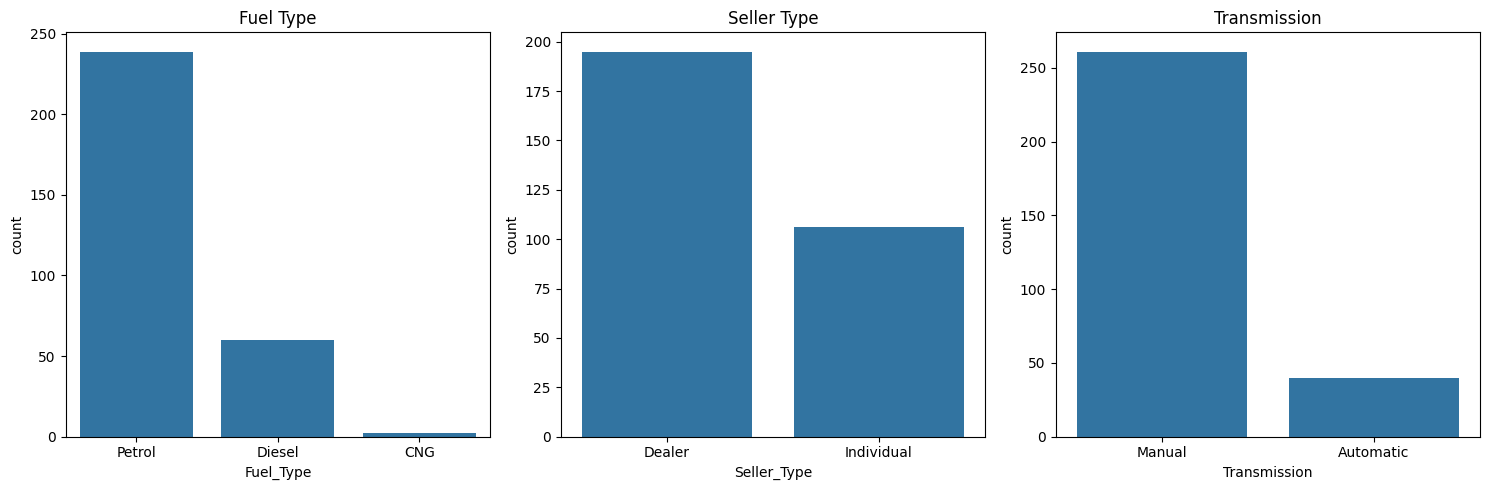

In [21]:
# Countplots for categorical features
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.countplot(x='Fuel_Type', data=car_dataset)
plt.title('Fuel Type')

plt.subplot(1, 3, 2)
sns.countplot(x='Seller_Type', data=car_dataset)
plt.title('Seller Type')

plt.subplot(1, 3, 3)
sns.countplot(x='Transmission', data=car_dataset)
plt.title('Transmission')
plt.tight_layout()
plt.show()

Encoding the Categorical Data

In [56]:
# encoding "Fuel_Type" Column
car_dataset.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)

# encoding "Seller_Type" Column
car_dataset.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)

# encoding "Transmission" Column
car_dataset.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [57]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


Splitting the data and Target

In [58]:
X = car_dataset.drop(['Car_Name','Selling_Price'],axis=1)
Y = car_dataset['Selling_Price']

In [27]:
print(X)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

In [28]:
print(Y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


Splitting Training and Test data

In [59]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=42)

Model Training

 1. Linear Regression

In [60]:
# loading the linear regression model
lin_reg_model = LinearRegression()

In [61]:
lin_reg_model.fit(X_train,Y_train)

LinearRegression()

Model Evaluation

In [62]:
# prediction on Training data
training_data_prediction = lin_reg_model.predict(X_train)

In [63]:
# R squared Error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.883979349675079


Visualize the actual prices and Predicted prices

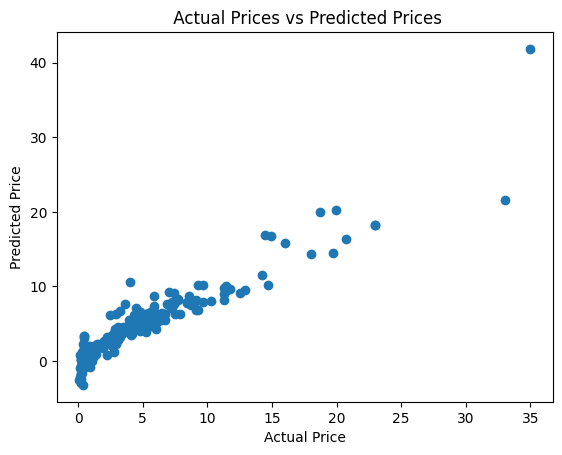

In [64]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [65]:
# prediction on Test data
test_data_prediction = lin_reg_model.predict(X_test)

In [66]:
# R squared Error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.8468053957655798


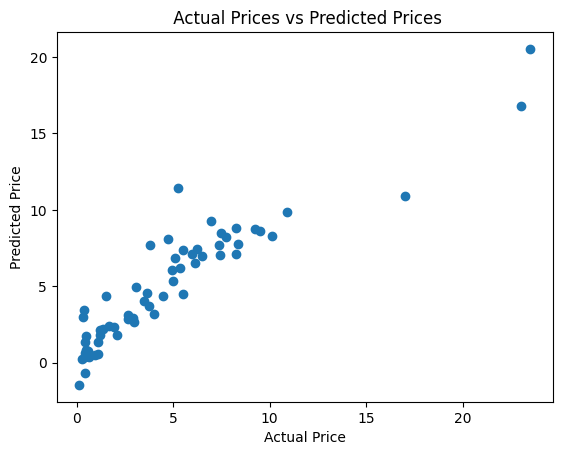

In [67]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

2. Lasso Regression

In [68]:
# loading the linear regression model
lass_reg_model = Lasso()

In [69]:
lass_reg_model.fit(X_train,Y_train)

Lasso()

Model Evaluation

In [70]:
# prediction on Training data
training_data_prediction = lass_reg_model.predict(X_train)

In [71]:
# R squared Error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.848030286813716


Visualize the actual prices and Predicted prices

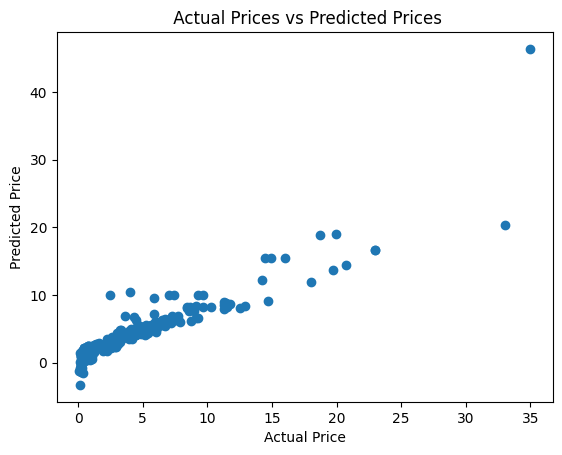

In [72]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [73]:
# prediction on Test data
test_data_prediction = lass_reg_model.predict(X_test)

In [74]:
# R squared Error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.798551246128469


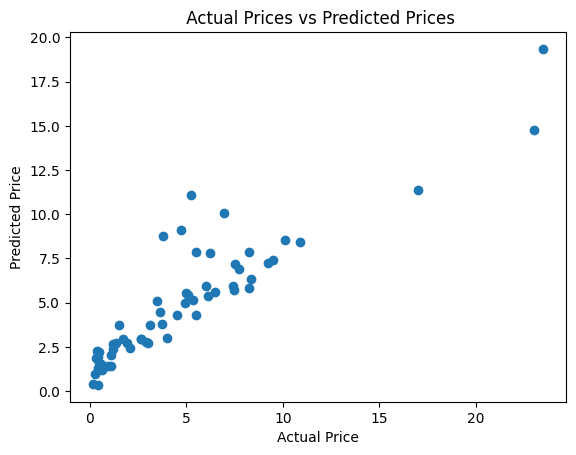

In [75]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

Saving the predicted values and the actual values in a csv file

In [76]:
results_df = pd.DataFrame({'Actual': Y_test, 'Predicted': test_data_prediction})
results_df.to_csv('actual_vs_predicted.csv', index=False)